In [31]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df = df.drop(['PassengerId',	'Name',	'Cabin', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis = 'columns')
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [34]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [36]:
df['Sex_n'] = Le.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [40]:
inputs = df[['Pclass','Age',	'Fare', 'Sex_n']]
inputs

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [44]:
target = df.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [50]:
model.fit(inputs, target)

DecisionTreeClassifier()

In [62]:
model.predict(X_test)[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [60]:
y_test[:10]

843    0
42     0
769    0
272    1
400    1
809    1
7      0
219    0
717    1
30     0
Name: Survived, dtype: int64

In [66]:
model.predict([[1,90,71,1]])

C:\Users\ANITHA SRI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [ ]:
# if the pclass is 1 and the age is 60 with a fare of 71 and a female would have survived as per the model

In [68]:
model.predict([[3,28,7,0]])

C:\Users\ANITHA SRI\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [70]:
# if the pclass is 3 and the age is 28 with a fare of 7 and a male would have survived as per the model

In [72]:
model.score(inputs, target)

0.978675645342312

In [78]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

In [80]:
cm

array([[116,   1],
       [  2,  60]], dtype=int64)

Text(50.722222222222214, 0.5, 'true')

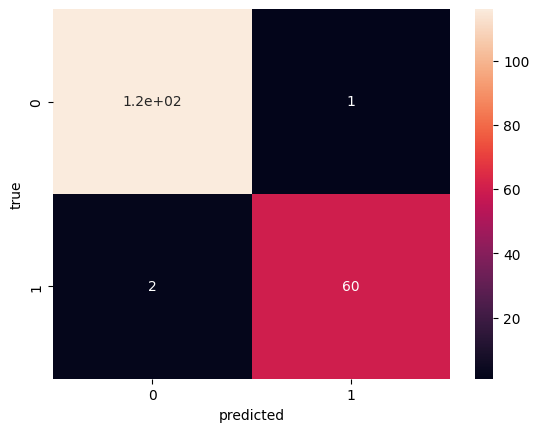

In [96]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(cm, annot= True)
plt.xlabel('predicted')
plt.ylabel('true')